In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_eps_reward (fname): 
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]

    fig, ax1 = plt.subplots(figsize=(13,7))

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('epsilon', color=color)
    ax1.plot(data[:,0], data[:,3], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('reward', color=color)  # we already handled the x-label with ax1
    ax2.plot(data[:,0], data[:,2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

def plot_boxPlot_score (fname,ftest):
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]
    data2 = pd.read_csv(ftest).to_numpy()
    data2 = data2[:,1:]
    d = [data[:,1],data2[:,1]]
    fig, ax= plt.subplots(figsize=(5,7))
    plt.boxplot(d)
    plt.title("Box plot Score")
    ax.set_xticklabels(['Train','Test'])
    plt.show()

def compare_resultTest_boxPlot(fname):
    result = []
    label=[]
    for i in range(1,6): 
        data = pd.read_csv(fname+str(i)+'.csv').to_numpy()[:,1:]
        label.append('Test R'+str(i))
        result.append(data[:,1])
    ig, ax= plt.subplots(figsize=(7,7))
    plt.boxplot(result)
    plt.title("Box plot Score")
    ax.set_xticklabels(label)
    plt.show()




# Qtable 
---
---

### States (126)
- Surrowding Head : 8
- Direction Apple : 8 

---

### Features  

- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 2000 epochs 
- Testing : 100 eochs


### Reward Function 1 
---
---
- Touch the Apple = 50
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -10
- Getting Clother of the Apple = 10 

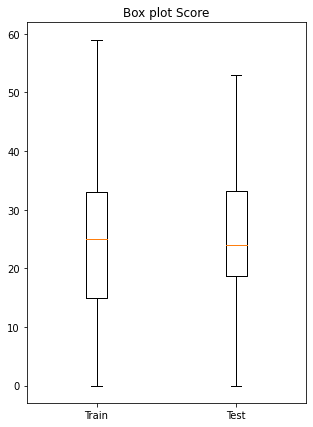

In [3]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R1.csv'
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R1.csv'
plot_boxPlot_score(path1,path)

### Reward Function 2
---
---
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = 0
- Getting Clother of the Apple = 0

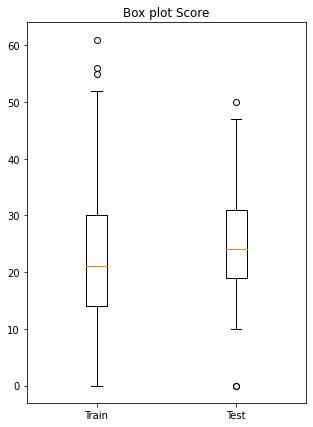

In [40]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R2.csv'
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R2.csv'

plot_boxPlot_score(path1,path)

## Reward Function 3
---
---
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -1
- Getting Clother of the Apple = 1

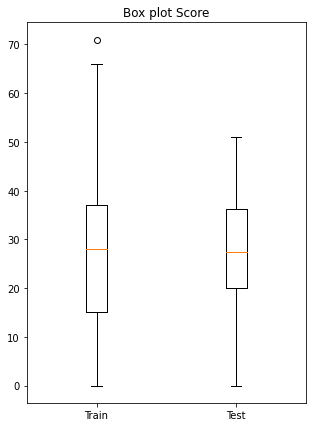

In [41]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R3.csv'
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R3.csv'
plot_boxPlot_score(path1,path)

### Reward Function 4
---
---
- Touch the Apple = 100
- Touch a Wall or Itself = -50
- Getting Far Away of the Apple = -10
- Getting Clother of the Apple = 10 

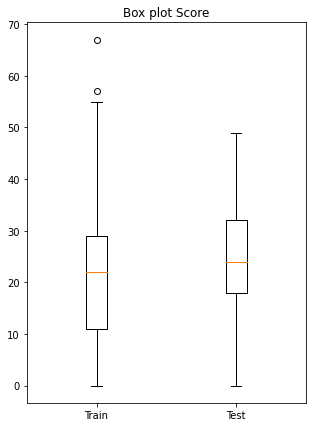

In [43]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R4.csv'
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R4.csv'
plot_boxPlot_score(path1,path)

### Reward Function 5
---
---
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -5
- Getting Clother of the Apple = 5

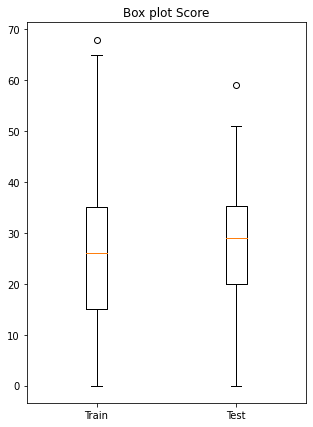

In [4]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R5.csv'
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R5.csv'
plot_boxPlot_score(path1,path)

## Compare Training and Testing result for each reward 

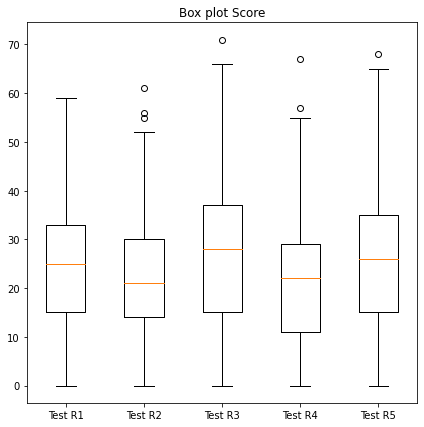

In [20]:
path = 'score/Qtable_train_e_2000_lr_0.1_df_0.9_R'
compare_resultTest_boxPlot(path)


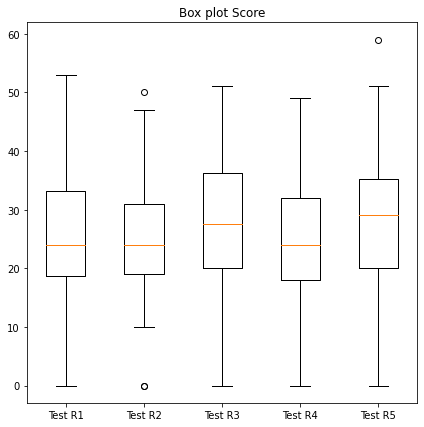

In [21]:
path = 'score/Qtable_test_e_100_lr_0.1_df_0.9_R'
compare_resultTest_boxPlot(path)

## Qnetwork 1
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 2000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 64 
- Input Layer : 25
- Hidden Layer 1 : ReLu /12
- Hidden Layer 1 : ReLu /6 
- Output Layer : 4 

--- 

Reward R5 




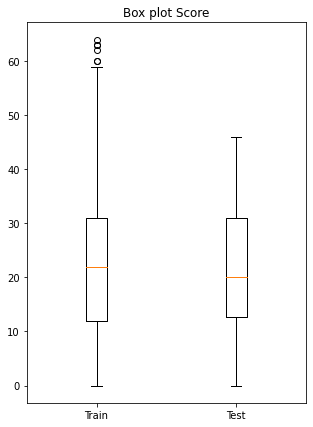

In [28]:
path1 = 'score/Qnet_train_e_2000_lr_0.1_df_0.9_R5.csv'
path = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5.csv'
plot_boxPlot_score(path1,path)


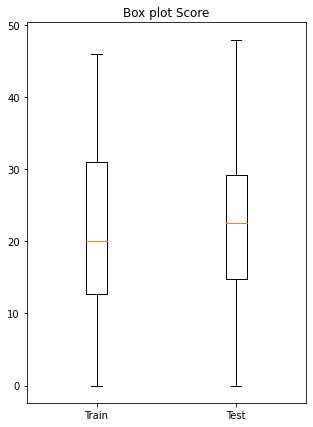

In [27]:
path1 = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5.csv'
path = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_2.csv'
plot_boxPlot_score(path1,path)

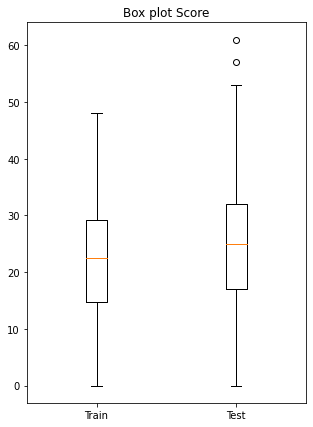

In [29]:
path1 = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_2.csv'
path = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_3.csv'
plot_boxPlot_score(path1,path)

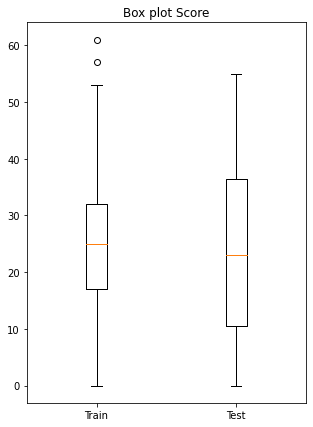

In [30]:
path1 = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_3.csv'
path = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_4.csv'
plot_boxPlot_score(path1,path)

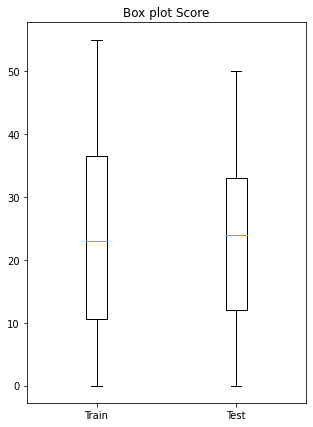

In [31]:
path1 = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_4.csv'
path = 'score/Qnet_test_e_100_lr_0.1_df_0.9_R5_5.csv'
plot_boxPlot_score(path1,path)

In [ ]:
# compare test and train of Qnet et Qtable 

# compare sum of all reward on Qnet and Q table